In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd .read_csv("data_clean.csv")

In [3]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
df.isnull().sum()>=1

Unnamed: 0    False
Ozone          True
Solar.R        True
Wind          False
Temp C        False
Month         False
Day           False
Year          False
Temp          False
Weather        True
dtype: bool

In [5]:
df.isnull().sum()[df.isnull().sum()>=1]

Ozone      38
Solar.R     7
Weather     3
dtype: int64

In [6]:
featur_na = [x for x in df.columns if df[x].isnull().sum()>=1]

In [7]:
for x in featur_na:
    print(x, np.round(df[x].isnull().mean()*100,2), '% missing values')

Ozone 24.05 % missing values
Solar.R 4.43 % missing values
Weather 1.9 % missing values


In [8]:
numerical_features = [x for x in df.columns if df[x].dtypes!='O']

In [9]:
df[numerical_features]

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
0,1,41.0,190.0,7.4,1,2010,67
1,2,36.0,118.0,8.0,2,2010,72
2,3,12.0,149.0,12.6,3,2010,74
3,4,18.0,313.0,11.5,4,2010,62
4,5,NaN,NaN,14.3,5,2010,56
...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,1,2010,67
154,155,30.0,193.0,6.9,26,2010,70
155,156,NaN,145.0,13.2,27,2010,77
156,157,14.0,191.0,14.3,28,2010,75


# DATA TYPE CONVERSION

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [11]:
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Temp C']= pd.to_numeric(df['Temp C'], errors='coerce')
df['Weather']= df['Weather'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       157 non-null    float64 
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 11.5 KB


# Duplicates

In [13]:
df[df.duplicated()].shape

(0, 10)

In [14]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Unnamed: 0, Ozone, Solar.R, Wind, Temp C, Month, Day, Year, Temp, Weather]
Index: []


In [15]:
data_cleaned = df.drop_duplicates()

In [16]:
data_cleaned.shape

(158, 10)

# DROP COLUMNS

In [17]:
data_cleaned2 = data_cleaned.drop('Temp C', axis=1)

In [18]:
data_cleaned_new = data_cleaned.drop(['Wind', 'Month', 'Temp'], axis=1)

In [19]:
data_cleaned_new.head()

,Unnamed: 0,Ozone,Solar.R,Temp C,Day,Year,Weather
0,1,41.0,190.0,67.0,1,2010,S
1,2,36.0,118.0,72.0,2,2010,C
2,3,12.0,149.0,74.0,3,2010,PS
3,4,18.0,313.0,62.0,4,2010,S
4,5,NaN,NaN,56.0,5,2010,S


In [20]:
data_cleaned.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S


# Rename the columns

In [21]:
# Rename the solar column
data_cleaned3 = data_cleaned.rename({'Solar.R': 'solar'}, axis=1)

In [22]:
data_cleaned3.head()

,Unnamed: 0,Ozone,solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S


# Outlier Detection

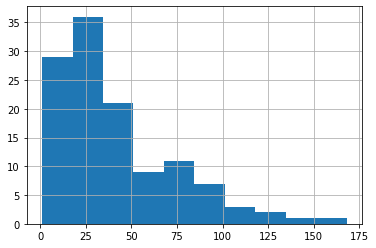

In [23]:
# histogram of ozone
data_cleaned['Ozone'].hist()
plt.show()

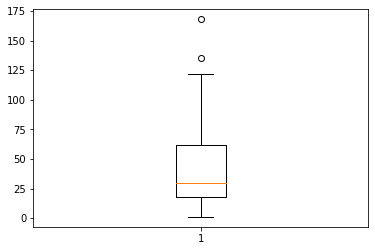

In [24]:
data_box=data_cleaned.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)
plt.show()

# missing values and imputation

In [25]:
data_cleaned.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         1
Month          1
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

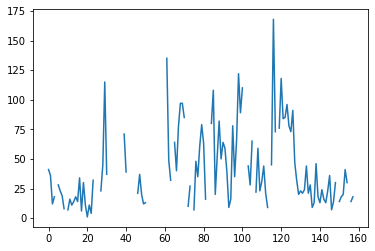

In [26]:
plt.plot(data_cleaned['Ozone'])
plt.show()

In [27]:
# median imputation
median = data_cleaned['Ozone'].median()
print(median)

30.5


In [28]:
data_cleaned["Ozone"]=data_cleaned['Ozone'].fillna(median)

In [29]:
data_cleaned['Ozone'].isnull().sum()

0

In [30]:
data_cleaned['Weather'].isnull().sum()

3

In [31]:
data_cleaned['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

In [32]:
data_cleaned.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar.R       7
Wind          0
Temp C        1
Month         1
Day           0
Year          0
Temp          0
Weather       3
dtype: int64

In [33]:
data_cleaned['Weather'].isnull().sum()

3

In [34]:
mode = data_cleaned['Weather'].mode()
print(mode)

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']


In [35]:
mode.iloc[0]

'S'

In [36]:
data = data_cleaned['Weather']

In [37]:
data_cleaned['Weather']= data.fillna(data.fillna('S'))

In [38]:
data_cleaned

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,30.5,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,156,30.5,145.0,13.2,77.0,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


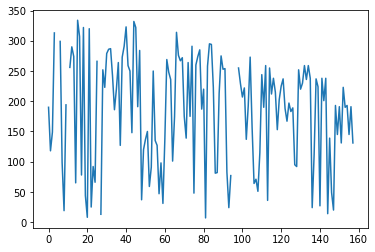

In [39]:
plt.plot(data_cleaned['Solar.R'])
plt.show()

In [40]:
median = data_cleaned['Solar.R'].median()
print(median)

197.0


In [41]:
data_cleaned['Solar.R'] = data_cleaned['Solar.R'].fillna(median)

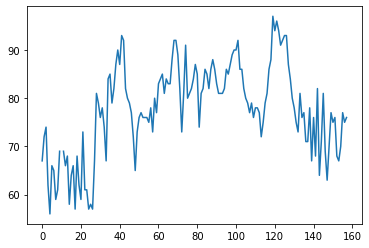

In [42]:
plt.plot(data_cleaned['Temp C'])
plt.show()

In [43]:
median = data_cleaned['Temp C'].median()
print(median)

79.0


In [44]:
data_cleaned['Temp C'] = data_cleaned['Temp C'].fillna(median)

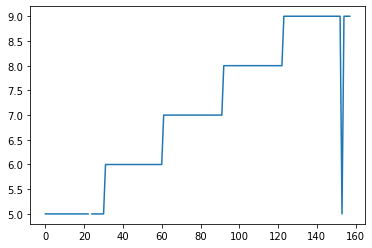

In [45]:
plt.plot(data_cleaned['Month'])
plt.show()

In [46]:
median = data_cleaned['Month'].median()
print(median)

7.0


In [47]:
data_cleaned['Month'] = data_cleaned['Month'].fillna(median)

In [48]:
# one hot encoding
one_hot_encoded_data = pd.get_dummies(data_cleaned, columns = ["Weather"])
print(one_hot_encoded_data)

     Unnamed: 0  Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp  \
0             1   41.0    190.0   7.4    67.0    5.0    1  2010    67   
1             2   36.0    118.0   8.0    72.0    5.0    2  2010    72   
2             3   12.0    149.0  12.6    74.0    5.0    3  2010    74   
3             4   18.0    313.0  11.5    62.0    5.0    4  2010    62   
4             5   30.5    197.0  14.3    56.0    5.0    5  2010    56   
..          ...    ...      ...   ...     ...    ...  ...   ...   ...   
153         154   41.0    190.0   7.4    67.0    5.0    1  2010    67   
154         155   30.0    193.0   6.9    70.0    9.0   26  2010    70   
155         156   30.5    145.0  13.2    77.0    9.0   27  2010    77   
156         157   14.0    191.0  14.3    75.0    9.0   28  2010    75   
157         158   18.0    131.0   8.0    76.0    9.0   29  2010    76   

     Weather_C  Weather_PS  Weather_S  
0            0           0          1  
1            1           0          0  
2  

In [49]:
one_hot_encoded_data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
4,5,30.5,197.0,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
155,156,30.5,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
156,157,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


# Normalization of the data 

In [50]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
df1=scaler.fit_transform(one_hot_encoded_data)
scaled_df = pd.DataFrame(df1, columns=one_hot_encoded_data.columns)
scaled_df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,0.000000,0.239521,0.559633,0.300000,0.268293,0.0,0.000000,0.0,0.268293,0.0,0.0,1.0
1,0.006369,0.209581,0.339450,0.331579,0.390244,0.0,0.033333,0.0,0.390244,1.0,0.0,0.0
2,0.012739,0.065868,0.434251,0.573684,0.439024,0.0,0.066667,0.0,0.439024,0.0,1.0,0.0
3,0.019108,0.101796,0.935780,0.515789,0.146341,0.0,0.100000,0.0,0.146341,0.0,0.0,1.0
4,0.025478,0.176647,0.581040,0.663158,0.000000,0.0,0.133333,0.0,0.000000,0.0,0.0,1.0
